In [ ]:
## 1.Load and prepare a dataset for binary classification.
## 2.Train an SVM with linear and RBF kernel.
## 3.Visualize decision boundary using 2D data.
## 4.Tune hyperparameters like C and gamma.
## 5.Use cross-validation to evaluate performance.


In [2]:
## 1.Load and prepare a dataset for binary classification.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\prati\Downloads\archive (8)\breast-cancer.csv")

df = df.drop(columns=['id'])

# Convert 'diagnosis' to binary (M = 1 for malignant, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select two features for simplicity and visualization
features = ['radius_mean', 'texture_mean']
X = df[features]
y = df['diagnosis']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of scaled training data:\n", X_train_scaled[:5])
print("First 5 labels:\n", y_train[:5].values)


First 5 rows of scaled training data:
 [[-1.44075296 -0.43531947]
 [ 1.97409619  1.73302577]
 [-1.39998202 -1.24962228]
 [-0.98179678  1.41622208]
 [-1.11769991 -1.0102595 ]]
First 5 labels:
 [0 1 0 0 0]


In [3]:
## 2.Train an SVM with linear and RBF kernel.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predict and evaluate linear kernel
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy with Linear Kernel:", acc_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate RBF kernel
y_pred_rbf = svm_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy with RBF Kernel:", acc_rbf)


Accuracy with Linear Kernel: 0.9035087719298246
Accuracy with RBF Kernel: 0.9210526315789473


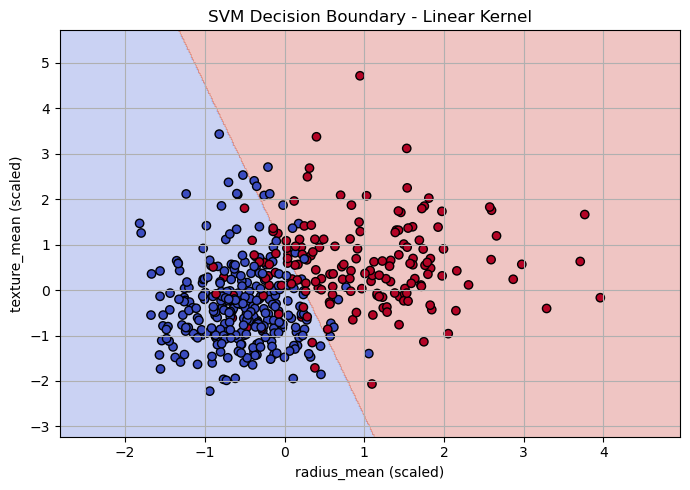

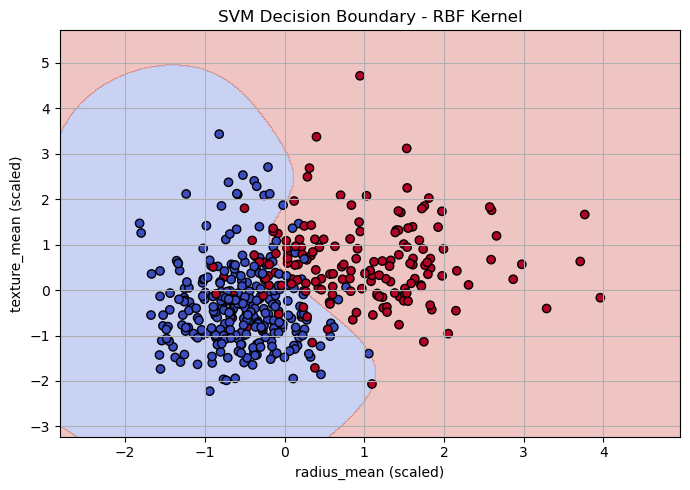

In [4]:
## 3.Visualize decision boundary using 2D data.

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('radius_mean (scaled)')
    plt.ylabel('texture_mean (scaled)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot decision boundary for linear kernel
plot_decision_boundary(svm_linear, X_train_scaled, y_train, "SVM Decision Boundary - Linear Kernel")

# Plot decision boundary for RBF kernel
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "SVM Decision Boundary - RBF Kernel")


In [5]:
## 4.Tune hyperparameters like C and gamma.

from sklearn.model_selection import GridSearchCV

# Define parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set
y_test_pred = grid.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy with Best Model:", test_accuracy)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9010989010989011
Test Set Accuracy with Best Model: 0.9122807017543859


In [6]:
## 5.Use cross-validation to evaluate performance.

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

# Output results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))



svm_linear_cv = SVC(kernel='linear', C=1.0)
linear_scores = cross_val_score(svm_linear_cv, X_train_scaled, y_train, cv=5)

print("Linear Kernel CV Accuracy:", np.mean(linear_scores))



Cross-Validation Scores: [0.85714286 0.92307692 0.95604396 0.89010989 0.86813187]
Mean CV Accuracy: 0.8989010989010989
Standard Deviation: 0.03638009968625684
Linear Kernel CV Accuracy: 0.8835164835164836
